## Importing necessary modules

In [5]:
import numpy as np
import random
from matplotlib import pyplot as plt

### Created a Module class which has attributes for each property

In [6]:
class Module():
    def __init__(self,module):
        module = module.split('|')
        self.name = module[0]
        self.staff = module[1]
        self.labs = module[2]
        self.constraints = module[3].split(',')
        
f = open('Modules.txt','r')
modules = []
line = f.readline()
while line:
    modules.append(Module(line))
    line = f.readline()
f.close()

### Function that generates a random function

In [7]:
def generate_random_timetable(modules):
    
    totalmodules = modules   
    for i in modules:
        totalmodules = totalmodules + ([i]*int(i.labs))
        
    timetable = np.full((60,),Module("Empty|None|None|None,None"),dtype=Module)
    
    k = 0
    for i in range(len(timetable)):
        timetable[i] = totalmodules[k]
        k = k+1
        if k>=len(totalmodules):
            break
    
    np.random.shuffle(timetable)
    timetable = np.reshape(timetable,(20,3))
    return timetable
tt = generate_random_timetable(modules)
for i in tt:
    print([i[0].name,i[1].name,i[2].name])

['Empty', 'MOD014', 'Empty']
['MOD010', 'MOD007', 'MOD006']
['MOD005', 'MOD012', 'MOD014']
['MOD003', 'Empty', 'MOD009']
['Empty', 'MOD017', 'MOD012']
['MOD004', 'MOD009', 'MOD008']
['MOD012', 'MOD016', 'MOD006']
['MOD010', 'MOD001', 'Empty']
['MOD014', 'Empty', 'MOD008']
['Empty', 'MOD010', 'Empty']
['MOD005', 'MOD011', 'MOD002']
['Empty', 'MOD006', 'MOD015']
['MOD008', 'MOD002', 'MOD006']
['MOD016', 'MOD003', 'Empty']
['Empty', 'MOD001', 'MOD015']
['MOD009', 'MOD001', 'MOD011']
['MOD002', 'MOD013', 'MOD003']
['MOD009', 'MOD015', 'MOD007']
['MOD013', 'MOD005', 'MOD004']
['MOD011', 'Empty', 'MOD017']


### Fitness function

In [8]:
def checkConcurrence(li):
    count = 0
    #Checks if module is against another module that clashes.
    if li[0].name in li[1].constraints or li[0].name in li[2].constraints:
        count = count + 1
    if li[1].name in li[2].constraints or li[1].name in li[0].constraints:
        count = count + 1
    if li[2].name in li[0].constraints or li[2].name in li[1].constraints:
        count = count + 1
    
    #Checks if one module is being held at the same time in different rooms.
    if li[0].name==li[1].name:
        count = count + 1
    if li[1].name==li[2].name:
        count = count + 1
    if li[2].name==li[0].name:
        count = count + 1
    
    return count

def checkPrecedence(li):
    count = 0
    for i in range(len(li)):
        lecture = li[i][0].name
        if lecture == 'Empty':
            continue
        for j in range(0,i):
            if lecture == li[j][0].name:
                count = count + 1
            if lecture == li[j][1].name:
                count = count + 1
            if lecture == li[j][2].name:
                count = count + 1
    return count

def fitness(timetable):
    precedence = checkPrecedence(timetable) + 1
  
    concurrence = 1
    for i in timetable:
        concurrence = concurrence + checkConcurrence(i)
    return precedence * concurrence
        
timetable = generate_random_timetable(modules)
print(fitness(timetable))

624


### Function to compare fitnesses

In [9]:
def compare_fitness(child,parent):
    return child<=parent

### Ruin and recreate mutator function

In [10]:
def ruin_and_recreate(timetable):
    timetable = generate_random_timetable(modules)
    return timetable

### Session Replace mutator function

In [11]:
def session_replace(timetable):
    row = np.random.randint(0,20,2)
    col = np.random.randint(0,3,2)
    t = timetable[row[0]][col[0]]
    timetable[row[0]][col[0]] = timetable[row[1]][col[1]]
    timetable[row[1]][col[1]] = t
    return timetable

### Hillclimber Function

In [12]:
def hillclimber(Niter, problem, data, generate, mutation, comparison):
    parent = generate(data)
    parent_fitness = problem(parent)
    fitness_list = [parent_fitness]
    
    for i in range(Niter):
        #Mutate
        child = mutation(parent)
        
        #Evaluate
        child_fitness = problem(child)
        
        #Pick next parent solution
        if comparison(child_fitness,parent_fitness):
            parent = child
            parent_fitness = child_fitness
            fitness_list.append(child_fitness)
        else:
            fitness_list.append(parent_fitness)
            
    return parent, fitness_list

### Find fitnesses

In [13]:
ruin_and_recreate_fitnesses = []
session_replace_fitnesses = []
for i in range(30):
    optimised_timetable, fitnesslist = hillclimber(500,fitness,modules,generate_random_timetable,ruin_and_recreate,compare_fitness)
    ruin_and_recreate_fitnesses.append(fitnesslist)
    
    optimised_timetable, fitnesslist = hillclimber(500,fitness,modules,generate_random_timetable,session_replace,compare_fitness)
    session_replace_fitnesses.append(fitnesslist)

In [10]:
final_ruin_fitnesses = [[max(i),(sum(i)/len(i)),min(i)] for i in ruin_and_recreate_fitnesses]
final_swap_fitnesses = [[max(i),(sum(i)/len(i)),min(i)] for i in session_replace_fitnesses]

### Plotting min, max and average of fitnesses

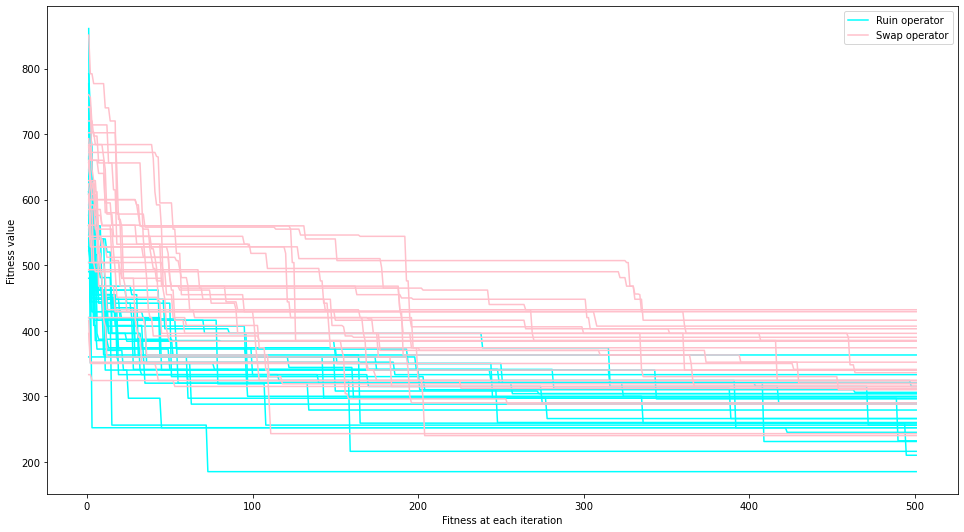

In [15]:
X = [i for i in range(1,502)]

plt.plot(X,ruin_and_recreate_fitnesses[0],color='cyan',label="Ruin operator")
for i in ruin_and_recreate_fitnesses[1:]:
    plt.plot(X,i,color='cyan')
    
plt.plot(X,session_replace_fitnesses[0],color='pink',label="Swap operator")
for i in session_replace_fitnesses[1:]:
    plt.plot(X,i,color='pink')

    
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.legend(loc="upper right")
plt.xlabel('Fitness at each iteration')
plt.ylabel('Fitness value')
plt.show()

### Plotting all fitnesses

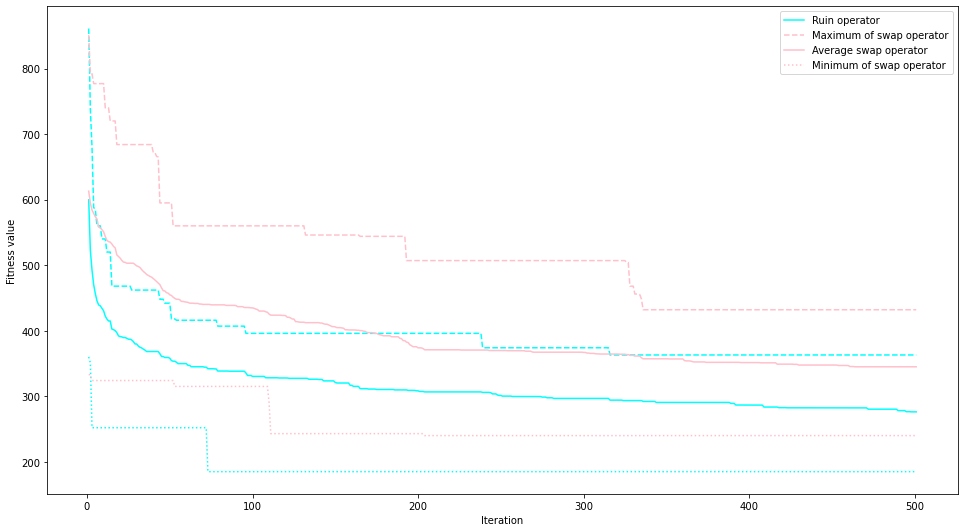

In [16]:
X = [i for i in range(1,502)]

ruin = np.array(ruin_and_recreate_fitnesses)
ruinmaxlist = [max(ruin[:,i]) for i in range(501)]
ruinavglist = [sum(ruin[:,i])/len(ruin[:,i]) for i in range(501)]
ruinminlist = [min(ruin[:,i]) for i in range(501)]

plt.plot(X,ruinmaxlist,color='cyan',linestyle='dashed')
plt.plot(X,ruinavglist,color='cyan',linestyle="solid",label="Ruin operator")
plt.plot(X,ruinminlist,color='cyan',linestyle="dotted")

    
swap = np.array(session_replace_fitnesses)
swapmaxlist = [max(swap[:,i]) for i in range(501)]
swapavglist = [sum(swap[:,i])/len(ruin[:,i]) for i in range(501)]
swapminlist = [min(swap[:,i]) for i in range(501)]

plt.plot(X,swapmaxlist,color='pink',linestyle="dashed",label="Maximum of swap operator")
plt.plot(X,swapavglist,color='pink',linestyle="solid",label="Average swap operator")
plt.plot(X,swapminlist,color='pink',linestyle="dotted",label="Minimum of swap operator")

    
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.legend(loc="upper right")
plt.xlabel('Iteration')
plt.ylabel('Fitness value')
plt.show()
print()

In [17]:

for i in optimised_timetable:
    print([i[0].name,i[1].name,i[2].name])


['MOD012', 'MOD014', 'Empty']
['MOD011', 'MOD001', 'MOD008']
['MOD003', 'MOD010', 'MOD003']
['Empty', 'MOD009', 'MOD016']
['MOD001', 'MOD011', 'Empty']
['MOD002', 'MOD006', 'Empty']
['MOD005', 'MOD002', 'MOD011']
['MOD007', 'MOD009', 'Empty']
['MOD002', 'MOD017', 'Empty']
['MOD003', 'MOD008', 'MOD012']
['MOD004', 'MOD009', 'Empty']
['Empty', 'MOD014', 'MOD005']
['Empty', 'MOD008', 'MOD015']
['MOD014', 'MOD009', 'Empty']
['MOD001', 'MOD010', 'Empty']
['MOD013', 'MOD016', 'MOD005']
['MOD006', 'MOD015', 'MOD010']
['Empty', 'MOD012', 'MOD015']
['MOD006', 'MOD007', 'MOD004']
['MOD013', 'MOD006', 'MOD017']


In [18]:
save = optimised_timetable
for i in save:
    print([i[0].name,i[1].name,i[2].name])
print("Fitness = ",fitness(optimised_timetable))

['MOD012', 'MOD014', 'Empty']
['MOD011', 'MOD001', 'MOD008']
['MOD003', 'MOD010', 'MOD003']
['Empty', 'MOD009', 'MOD016']
['MOD001', 'MOD011', 'Empty']
['MOD002', 'MOD006', 'Empty']
['MOD005', 'MOD002', 'MOD011']
['MOD007', 'MOD009', 'Empty']
['MOD002', 'MOD017', 'Empty']
['MOD003', 'MOD008', 'MOD012']
['MOD004', 'MOD009', 'Empty']
['Empty', 'MOD014', 'MOD005']
['Empty', 'MOD008', 'MOD015']
['MOD014', 'MOD009', 'Empty']
['MOD001', 'MOD010', 'Empty']
['MOD013', 'MOD016', 'MOD005']
['MOD006', 'MOD015', 'MOD010']
['Empty', 'MOD012', 'MOD015']
['MOD006', 'MOD007', 'MOD004']
['MOD013', 'MOD006', 'MOD017']
Fitness =  420
